# Yelp Data - Let's only look at Reviews

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reviews Dataset

Here are the columns

| column | description | type |
|--------|-------------|------|
| business_id | ? | string |
| cool | ? | int64 |
| date | date of review | datetime64 |
| funny | count of people voted funny? | int64 |
| review_id | unique identifer | string |
| stars | stars of the review - discrete values (1 to 5) | int64 |
| text | ? | string |
| usefule | vote on usefulness | int64 |
| user_id | user unique identifier | string |

There are 6685900 unique entries

Memory usage for the entire DF = 459.1+ MB

1637138 unique users

192606 businesses - 3 less that businesses listed in business file

Full dataset will take about 30 minutes to load

try review_short.json which only has the first 50k entries

In [2]:
reviews = pd.read_json('dataset/yelp_dataset2019/review_short.json', lines=True)

In [3]:
print(reviews.info())
reviews.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
business_id    50000 non-null object
cool           50000 non-null int64
date           50000 non-null datetime64[ns]
funny          50000 non-null int64
review_id      50000 non-null object
stars          50000 non-null int64
text           50000 non-null object
useful         50000 non-null int64
user_id        50000 non-null object
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 3.4+ MB
None


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg


In [4]:
# let's drop columns that we won't need
# keep business_id, review_id, text, and user_id for now
# reviews.drop(['cool', 'date', 'funny', 'useful'])


In [5]:
reviews_by_users = reviews.groupby('user_id').size().sort_values(ascending=False)
print(len(reviews_by_users))
reviews_by_users.head(20)

42988


user_id
CxDOIDnH8gp9KXzpBHJYXw    25
bLbSNkLggFnqwNNzzq-Ijw    17
PKEzKWv_FktMm2mGPjwd0Q    16
62GNFh5FySkA3MbrQmnqvg    16
QJI9OSEn6ujRCtrX06vs1w    15
hWDybu_KvYLSdEFzGrniTw    13
rCWrxuRC8_pfagpchtHp6A    12
-InhDRRVG7wrwsgAUvN4Qw    12
cMEtAiW60I5wE_vLfTxoJQ    11
Wc5L6iuvSNF5WGBlqIO8nw    11
qewG3X2O4X6JKskxyyqFwQ    11
ELcQDlf69kb-ihJfxZyL0A    11
L8P5OWO1Jh4B2HLa1Fnbng    10
ciXjBfJrAEteIKpzZg4I9g    10
fiGqQ7pIGKyZ9G0RqWLMpg    10
sTcYq6goD1Fa2WS9MSkSvQ    10
rKkpHJkJ27xOwnhy_bMkvA     9
3nDUQBjKyVor5wV0reJChg     9
71XStF5U0kmJw2Iym9fclQ     9
QHX3NxFAlda3I32taYzI8w     9
dtype: int64

Text(0, 0.5, 'Number of Users')

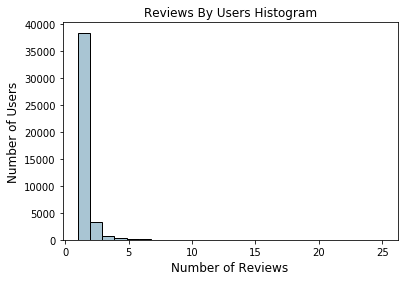

In [6]:
# plot user review histogram to see how often users provide reviews
fig, ax = plt.subplots()
reviews_by_users.hist(bins=25, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('Reviews By Users Histogram', fontsize=12)
ax.set_xlabel('Number of Reviews', fontsize=12)
ax.set_ylabel('Number of Users', fontsize=12)

In [7]:
# quantile binning of businesses and number of reviews
quantile_list = [0, .25, .5, .75, 1.]
quantiles = reviews_by_users.quantile(quantile_list)

# fig, ax = plt.subplots()
# reviews.business_id.hist(bins=30, color='#A9C5D3', 
#                              edgecolor='black', grid=False)

# for quantile in quantiles:
#     qvl = plt.axvline(quantile, color='r')

print(type(quantiles))
quantiles.head()


<class 'pandas.core.series.Series'>


0.00     1.0
0.25     1.0
0.50     1.0
0.75     1.0
1.00    25.0
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x121ace470>,
 'caps': [<matplotlib.lines.Line2D at 0x121aceb00>,
 'boxes': [<matplotlib.lines.Line2D at 0x121ace080>],
 'medians': [<matplotlib.lines.Line2D at 0x121acef28>],
 'fliers': [<matplotlib.lines.Line2D at 0x121ade518>],
 'means': []}

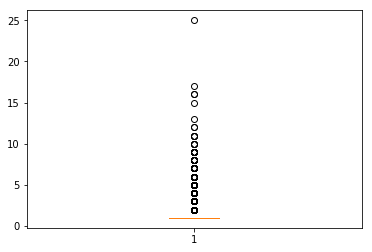

In [15]:
fig, ax = plt.subplots()
plt.boxplot(reviews_by_users)

In [8]:
reviews_by_business = reviews.groupby('business_id').size().sort_values(ascending=False)
print(len(reviews_by_business))
reviews_by_business.head(10)

10659


business_id
ujHiaprwCQ5ewziu0Vi9rw    376
faPVqws-x-5k2CQKDNtHxw    281
Wxxvi3LZbHNIDwJ-ZimtnA    279
HhVmDybpU7L50Kb5A0jXTg    270
XXW_OFaYQkkGOGniujZFHg    264
pH0BLkL4cbxKzu471VZnuA    194
yNPh5SO-7wr8HPpVCDPbXQ    152
uuGL8diLlHfeUeFuod3F-w    150
Xg5qEQiB-7L6kGJ5F4K3bQ    148
N0apJkxIem2E8irTBRKnHw    147
dtype: int64

Text(0, 0.5, 'Number of Business')

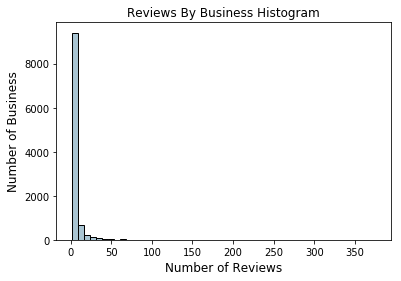

In [9]:
# plot reviews by business histogram to see how many business have how many review
fig, ax = plt.subplots()
reviews_by_business.hist(bins=50, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('Reviews By Business Histogram', fontsize=12)
ax.set_xlabel('Number of Reviews', fontsize=12)
ax.set_ylabel('Number of Business', fontsize=12)

In [10]:
# quantile binning of businesses and number of reviews
quantile_list = [0, .25, .5, .75, 1.]
quantiles = reviews_by_users.quantile(quantile_list)

# fig, ax = plt.subplots()
# reviews.business_id.hist(bins=30, color='#A9C5D3', 
#                              edgecolor='black', grid=False)

# for quantile in quantiles:
#     qvl = plt.axvline(quantile, color='r')

print(type(quantiles))
quantiles.head()


<class 'pandas.core.series.Series'>


0.00     1.0
0.25     1.0
0.50     1.0
0.75     1.0
1.00    25.0
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x12117bef0>,
 'caps': [<matplotlib.lines.Line2D at 0x12118c828>,
 'boxes': [<matplotlib.lines.Line2D at 0x12117bda0>],
 'medians': [<matplotlib.lines.Line2D at 0x12118cfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12119b320>],
 'means': []}

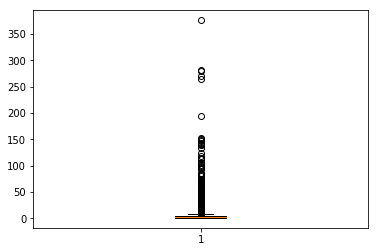

In [14]:
fig, ax = plt.subplots()
plt.boxplot(reviews_by_business)

Text(0, 0.5, 'Number of Reviews')

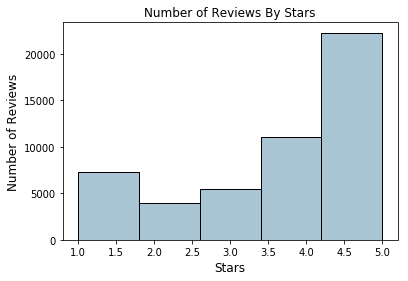

In [11]:
# reviews.hist(column='stars', grid=False)
fig, ax = plt.subplots()
reviews.stars.hist(bins=5, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('Number of Reviews By Stars', fontsize=12)
ax.set_xlabel('Stars', fontsize=12)
ax.set_ylabel('Number of Reviews', fontsize=12)

In [12]:
# let's look at useful reviews
# looks like most reviews do not have a useful rating
quantile_list = [0, .25, .5, .75, 1.]
reviews.useful.quantile(quantile_list)

0.00      0.0
0.25      0.0
0.50      0.0
0.75      1.0
1.00    101.0
Name: useful, dtype: float64

# Let's start looking at reviews. 
## How many sentences are there? in each review
## How many words are in each review?